In [33]:
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import os
from random import randint
import sys
from typing import Tuple

In [34]:
sys.path.append("../")
tests_dir = os.path.abspath("../tests")
sys.path.append(tests_dir)

In [35]:
from traffic_simulator.city_map import CityMap
from traffic_simulator.model import TimeDeltaDiff
from traffic_simulator.traffic_analysis import TrafficAnalyzer
from traffic_simulator.traffic_simulation import Simulator
from conftest import generate_static_city_map, generate_static_trips

##### Generate City Map

In [36]:
r2_city_map = generate_static_city_map()
r2_city_map

In [37]:
CityMap.get_city_map_statistics(r2_city_map)

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


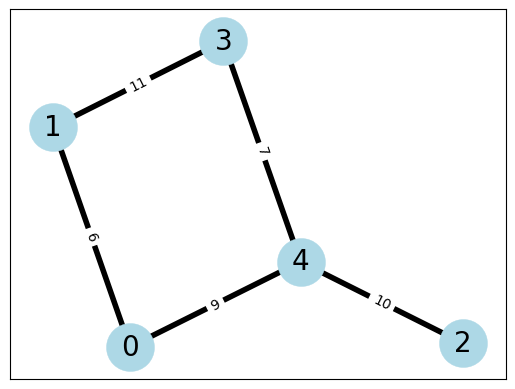

In [38]:
CityMap.visualize_city_map(r2_city_map)

# Generate Static Trips

In [39]:
r2_trips = generate_static_trips()
len(r2_trips)

20

# R2

#### The benefit values of constructing the following new roads:
#### (0,2), (0,3), (1,2), (1,4), (2,3)
#### Use a k value (budget) of 2, which two of the above roads would you recommend for construction? Remember that once the first road is 
#### constructed, benefits that you initially computed for the other 4 will now change and these will need to be recomputed.

##### Generate Benefit Matrix k = 0 # Initial Benefit Matrix

In [40]:
def get_max_benefit_road_segment(max_benefit_matrix: DataFrame) -> Tuple[int, int]:
    max_benefit = max_benefit_matrix.iloc[0].values
    source = int(max_benefit[0])
    destination = int(max_benefit[1])
    
    return source, destination

In [41]:
r2_benefit_matrix, n1, n2, n1_n2_truth_table_data = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips,debug=True)
r2_benefit_matrix

,source,destination,benefit
3,2,3,38.6
4,0,2,38.0
0,1,2,30.0
2,1,4,30.0
1,0,3,12.8


In [42]:
### n1 and n2 Truth Tables - show details of internal algorithmic calculations
n1_n2_truth_table_data

,x,y,nx_neighbor,ny_neighbor,nx_indirect_benefits,ny_indirect_benefits,indirect_x,indirect_y,has_edge_indirect_x_y,has_edge_nx_neighbor_indirect_y,has_edge_indirect_x_x,has_edge_ny_neighbor_indirect_y
0,1,2,4,-1,"{(4, 1), (1, 4)}",{},4,1,T,F,F,F
1,1,2,4,-1,"{(4, 1), (1, 4)}",{},1,4,F,F,F,F
2,1,2,-1,0,{},"{(0, 2), (2, 0)}",0,2,F,F,T,F
3,1,2,-1,0,{},"{(0, 2), (2, 0)}",2,0,F,F,F,F
4,1,2,-1,3,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",2,3,F,F,F,F
5,1,2,-1,3,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",0,2,F,F,T,F
6,1,2,-1,3,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",2,0,F,F,F,F
7,1,2,-1,3,{},"{(2, 3), (0, 2), (2, 0), (3, 2)}",3,2,F,F,T,F
8,1,2,-1,-1,{},{},-1,-1,F,F,F,F
9,0,3,-1,-1,{},{},-1,-1,F,F,F,F


In [43]:
##### k = 1 # Recommended road to build first is the road segment (2,3)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
3,2,3,38.6


In [44]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(2, 3)


{(0, 1): 6, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


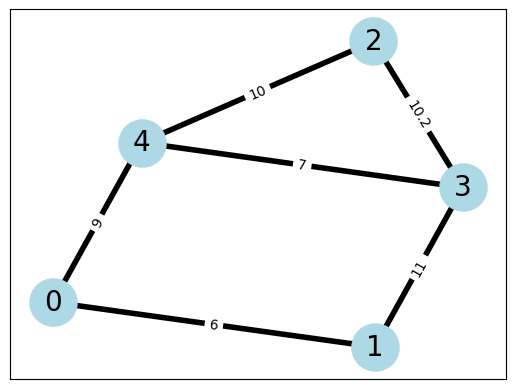

In [45]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

In [46]:
r2_benefit_matrix, n1, n2, n1_n2_truth_table_data = TrafficAnalyzer.get_road_recommendations(r2_city_map, r2_trips,debug=True)
r2_benefit_matrix

,source,destination,benefit
1,0,2,26.6
0,1,2,26.0
3,1,4,18.6
2,0,3,12.8


In [47]:
### n1 and n2 Truth Tables - show details of internal algorithmic calculations
n1_n2_truth_table_data

,x,y,nx_neighbor,ny_neighbor,nx_indirect_benefits,ny_indirect_benefits,indirect_x,indirect_y,has_edge_indirect_x_y,has_edge_nx_neighbor_indirect_y,has_edge_indirect_x_x,has_edge_ny_neighbor_indirect_y
0,1,2,4,-1,"{(4, 1), (1, 4)}",{},4,1,T,F,F,F
1,1,2,4,-1,"{(4, 1), (1, 4)}",{},1,4,F,F,F,F
2,1,2,-1,0,{},"{(0, 2), (2, 0)}",0,2,F,F,T,F
3,1,2,-1,0,{},"{(0, 2), (2, 0)}",2,0,F,F,F,F
4,1,2,-1,3,{},"{(0, 2), (2, 0)}",0,2,F,F,T,F
5,1,2,-1,3,{},"{(0, 2), (2, 0)}",2,0,F,F,F,T
6,0,2,3,-1,"{(0, 3), (3, 0)}",{},0,3,F,F,F,F
7,0,2,3,-1,"{(0, 3), (3, 0)}",{},3,0,T,F,F,F
8,0,2,4,-1,"{(0, 3), (3, 0)}",{},0,3,F,T,F,F
9,0,2,4,-1,"{(0, 3), (3, 0)}",{},3,0,T,T,F,F


In [48]:
##### k = 2 # Next recommended road to be built is the road segment (0,2)
r2_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r2_benefit_matrix)
r2_max_benefit_matrix

,source,destination,benefit
1,0,2,26.6


In [49]:
source, destination = get_max_benefit_road_segment(r2_max_benefit_matrix)
print(f"({source}, {destination})")

(0, 2)


{(0, 1): 6, (0, 4): 9, (0, 2): 11.4, (1, 3): 11, (4, 2): 10, (4, 3): 7, (3, 2): 10.2}


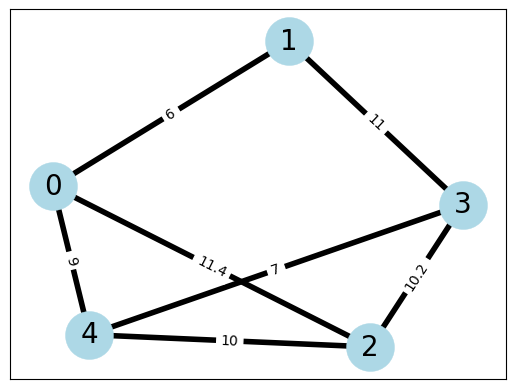

In [50]:
CityMap.add_road_segment(r2_city_map, source, destination)
CityMap.visualize_city_map(r2_city_map)

# R3

In [56]:
r3_city_map = Simulator.generate_map()
r3_city_map

In [57]:
r4_city_map = r3_city_map.copy()
r4_city_map

In [58]:
CityMap.get_city_map_statistics(r3_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

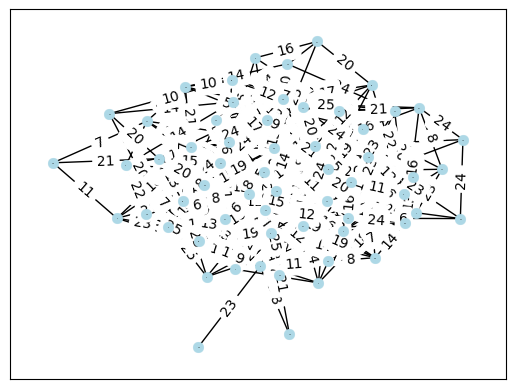

In [59]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [60]:
def get_traffic_times() -> Tuple[datetime, datetime]: 
    # (8 AM - 6 PM) # 10 hour time span
    start_time = datetime.strptime('08:00', '%H:%M').time()
    end_time = datetime.strptime('18:00', '%H:%M').time()
    
    start_date = datetime.now() - timedelta(days=30)
    random_start_datetime = datetime.combine(start_date.date(), start_time)
    
    random_end_datetime = random_start_datetime + timedelta(hours=10)

    return random_start_datetime, random_end_datetime
    
traffic_start_datetime, traffic_end_datetime = get_traffic_times()

print("Traffic start datetime:", traffic_start_datetime)
print("Traffic end datetime", traffic_end_datetime)

Traffic start datetime: 2024-01-17 08:00:00
Traffic end datetime 2024-01-17 18:00:00


In [63]:
r3_r4_trips = Simulator.generate_trips(r3_city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r3_r4_number_of_trips = 0

for trip in r3_r4_trips:
    r3_r4_number_of_trips += trip.numer_of_trips

r3_r4_number_of_trips

36000

In [67]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
1003,36,45,2525.8
25,14,37,1906.8
278,31,36,1880.2
527,38,45,1760.0
570,22,31,1744.0
...,...,...,...
852,28,42,172.0
164,10,53,168.4
1446,5,28,158.4
1355,26,32,149.6


In [68]:
##### k = 1 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
1003,36,45,2525.8


In [69]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(36, 45)


In [70]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

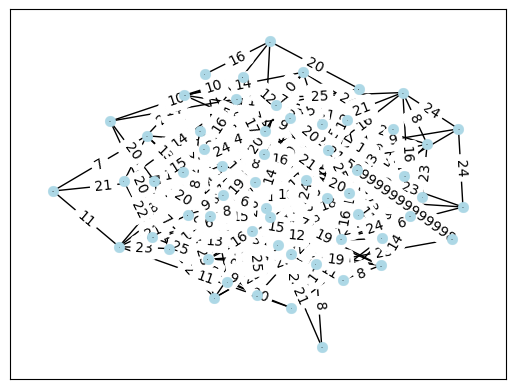

In [71]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [72]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
527,38,45,1930.72
25,14,37,1906.80
1283,30,45,1831.44
570,22,31,1744.00
615,32,48,1616.60
...,...,...,...
852,28,42,172.00
164,10,53,168.40
1445,5,28,158.40
1354,26,32,149.60


In [73]:
##### k = 2 # Recommended road to build first is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
527,38,45,1930.72


In [74]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(38, 45)


In [75]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

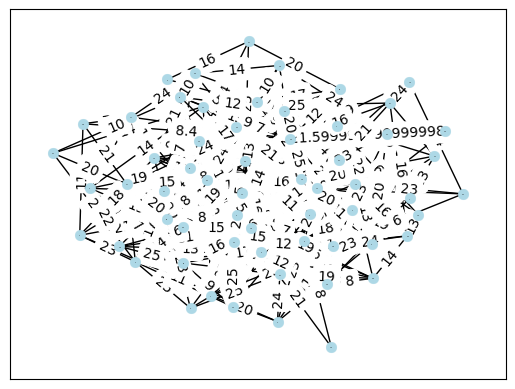

In [76]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

In [77]:
r3_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r3_city_map, r3_r4_trips)
r3_benefit_matrix

,source,destination,benefit
25,14,37,1906.80
1282,30,45,1831.44
953,3,45,1769.04
318,45,46,1760.60
944,22,45,1643.52
...,...,...,...
164,10,53,168.40
1193,2,49,162.00
1444,5,28,158.40
1353,26,32,149.60


In [78]:
##### k = 3 # Recommended road to build last is the road segment
r3_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r3_benefit_matrix)
r3_max_benefit_matrix

,source,destination,benefit
25,14,37,1906.8


In [79]:
source, destination = get_max_benefit_road_segment(r3_max_benefit_matrix)
print(f"({source}, {destination})")

(14, 37)


In [80]:
CityMap.add_road_segment(r3_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

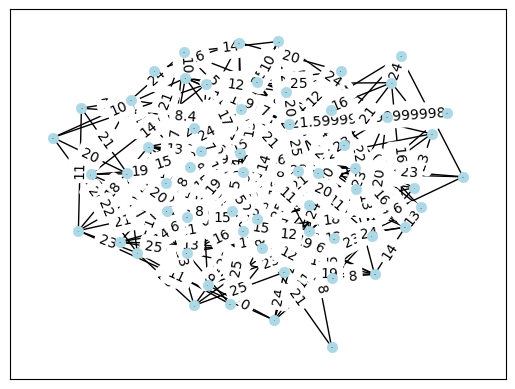

In [81]:
CityMap.visualize_city_map(r3_city_map, location_size=60, location_font_size=1, road_widths=1)

# R4

In [82]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
1003,36,45,1139.6
278,31,36,919.0
25,14,37,856.4
527,38,45,843.0
570,22,31,812.2
...,...,...,...
1446,5,28,67.2
544,34,52,62.4
375,56,58,57.6
1475,3,58,56.0


In [83]:
##### k = 1 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
1003,36,45,1139.6


In [84]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(36, 45)


In [85]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

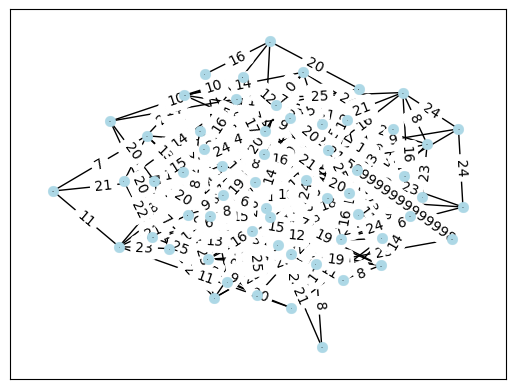

In [86]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [87]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
527,38,45,946.36
25,14,37,856.40
1283,30,45,841.72
570,22,31,812.20
954,3,45,694.04
...,...,...,...
1445,5,28,67.20
544,34,52,62.40
375,56,58,57.60
1474,3,58,56.00


In [88]:
##### k = 2 # Recommended road to build first is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
527,38,45,946.36


In [89]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(38, 45)


In [90]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

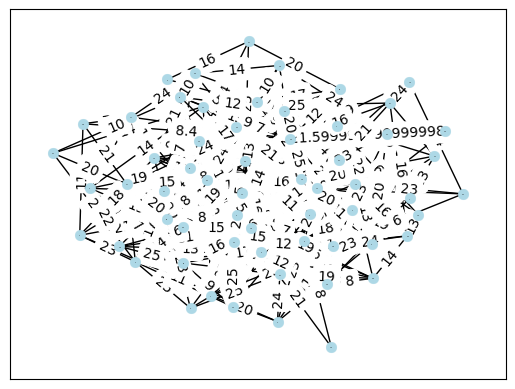

In [91]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

In [92]:
r4_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r4_city_map, r3_r4_trips, shrinkage_factor=0.8)
r4_benefit_matrix

,source,destination,benefit
25,14,37,856.40
1282,30,45,841.72
318,45,46,789.80
953,3,45,772.04
569,22,31,748.20
...,...,...,...
1444,5,28,67.20
543,34,52,62.40
375,56,58,57.60
1473,3,58,56.00


In [93]:
##### k = 3 # Recommended road to build last is the road segment
r4_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r4_benefit_matrix)
r4_max_benefit_matrix

,source,destination,benefit
25,14,37,856.4


In [94]:
source, destination = get_max_benefit_road_segment(r4_max_benefit_matrix)
print(f"({source}, {destination})")

(14, 37)


In [95]:
CityMap.add_road_segment(r4_city_map, source, destination)

{(0, 20): 8, (0, 3): 23, (0, 35): 5, (0, 59): 14, (0, 14): 24, (0, 27): 17, (0, 47): 12, (0, 32): 20, (0, 5): 25, (1, 12): 11, (1, 52): 23, (1, 50): 7, (1, 58): 7, (1, 39): 9, (1, 15): 6, (1, 13): 23, (1, 8): 19, (1, 22): 23, (2, 11): 20, (2, 3): 11, (2, 54): 24, (2, 8): 23, (2, 48): 11, (2, 20): 18, (3, 10): 12, (3, 38): 11, (3, 13): 18, (3, 31): 21, (4, 22): 23, (4, 14): 18, (4, 55): 19, (4, 6): 5, (4, 44): 15, (4, 5): 15, (4, 45): 20, (4, 15): 6, (5, 18): 7, (5, 31): 23, (5, 54): 25, (6, 25): 11, (6, 45): 13, (6, 31): 13, (6, 12): 22, (6, 46): 8, (6, 27): 12, (6, 21): 17, (6, 36): 23, (7, 12): 24, (7, 18): 22, (7, 22): 23, (7, 25): 7, (7, 45): 19, (8, 14): 19, (8, 23): 9, (8, 40): 22, (8, 35): 13, (8, 52): 20, (8, 51): 15, (8, 15): 8, (8, 34): 8, (8, 42): 10, (9, 31): 15, (9, 28): 13, (9, 56): 16, (9, 49): 25, (9, 48): 5, (9, 55): 12, (9, 46): 21, (9, 11): 21, (9, 47): 11, (9, 45): 18, (9, 58): 14, (10, 29): 11, (10, 16): 14, (10, 45): 15, (10, 54): 11, (10, 50): 25, (10, 30): 19, (

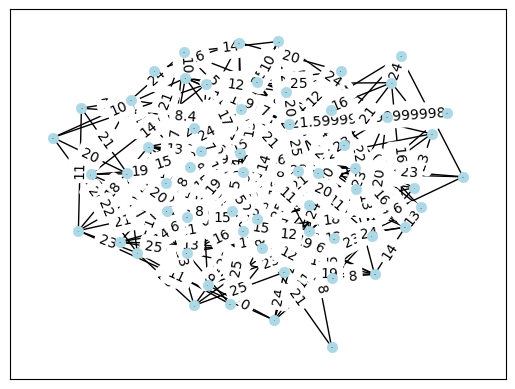

In [96]:
CityMap.visualize_city_map(r4_city_map, location_size=60, location_font_size=1, road_widths=1)

# R5

In [97]:
r5_city_map = Simulator.generate_map(connectedness=0.10)
r5_city_map

In [98]:
CityMap.get_city_map_statistics(r5_city_map)

node degree and node clustering
0 9 0.08333333333333333
1 9 0.1111111111111111
2 6 0.06666666666666667
3 6 0
4 8 0.14285714285714285
5 5 0
6 9 0.1388888888888889
7 5 0.1
8 11 0.16363636363636364
9 11 0.16363636363636364
10 8 0.03571428571428571
11 6 0.26666666666666666
12 12 0.13636363636363635
13 10 0.08888888888888889
14 16 0.11666666666666667
15 7 0.2857142857142857
16 9 0.05555555555555555
17 6 0.06666666666666667
18 11 0.07272727272727272
19 4 0.3333333333333333
20 6 0.06666666666666667
21 9 0.19444444444444445
22 5 0.1
23 8 0.21428571428571427
24 6 0.2
25 7 0.09523809523809523
26 6 0.2
27 9 0.2222222222222222
28 6 0.13333333333333333
29 11 0.16363636363636364
30 7 0.14285714285714285
31 13 0.16666666666666666
32 4 0.16666666666666666
33 7 0.047619047619047616
34 10 0.08888888888888889
35 5 0.1
36 1 0
37 4 0
38 3 0
39 7 0.14285714285714285
40 11 0.16363636363636364
41 7 0.09523809523809523
42 10 0.13333333333333333
43 8 0.03571428571428571
44 8 0.14285714285714285
45 16 0.09166666

{(0, 20): 8, (0, 3): 17, (0, 35): 20, (0, 59): 8, (0, 14): 13, (0, 27): 21, (0, 47): 8, (0, 32): 6, (0, 5): 17, (1, 12): 19, (1, 52): 5, (1, 50): 13, (1, 58): 18, (1, 39): 20, (1, 15): 15, (1, 13): 20, (1, 8): 6, (1, 22): 22, (2, 11): 24, (2, 3): 7, (2, 54): 18, (2, 8): 25, (2, 48): 14, (2, 20): 20, (3, 10): 19, (3, 38): 23, (3, 13): 7, (3, 31): 5, (4, 22): 20, (4, 14): 20, (4, 55): 18, (4, 6): 20, (4, 44): 12, (4, 5): 5, (4, 45): 16, (4, 15): 11, (5, 18): 14, (5, 31): 12, (5, 54): 19, (6, 25): 12, (6, 45): 9, (6, 31): 18, (6, 12): 20, (6, 46): 22, (6, 27): 10, (6, 21): 18, (6, 36): 13, (7, 12): 8, (7, 18): 24, (7, 22): 8, (7, 25): 21, (7, 45): 20, (8, 14): 8, (8, 23): 24, (8, 40): 7, (8, 35): 5, (8, 52): 21, (8, 51): 20, (8, 15): 11, (8, 34): 5, (8, 42): 15, (9, 31): 12, (9, 28): 14, (9, 56): 5, (9, 49): 10, (9, 48): 19, (9, 55): 18, (9, 46): 6, (9, 11): 9, (9, 47): 14, (9, 45): 6, (9, 58): 12, (10, 29): 21, (10, 16): 21, (10, 45): 21, (10, 54): 19, (10, 50): 24, (10, 30): 23, (10, 42

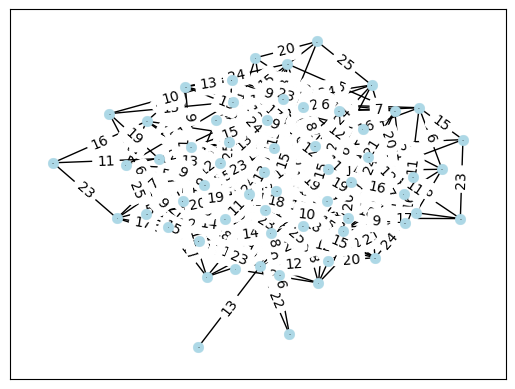

In [99]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [101]:
r5_trips = Simulator.generate_trips(r5_city_map,
                                 traffic_start_datetime,
                                 traffic_end_datetime,
                                 TimeDeltaDiff.SECONDS)
r5_number_of_trips = 0

for trip in r5_trips:
    r5_number_of_trips += trip.numer_of_trips

r5_number_of_trips

36000

In [103]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
1003,36,45,2518.2
1125,45,54,1560.0
1521,45,58,1546.8
318,45,46,1528.4
1502,14,57,1520.2
...,...,...,...
1266,11,55,140.4
350,27,46,127.6
1520,34,49,124.8
1334,11,35,112.0


In [104]:
##### k = 1 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
1003,36,45,2518.2


In [105]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(36, 45)


In [106]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 8, (0, 3): 17, (0, 35): 20, (0, 59): 8, (0, 14): 13, (0, 27): 21, (0, 47): 8, (0, 32): 6, (0, 5): 17, (1, 12): 19, (1, 52): 5, (1, 50): 13, (1, 58): 18, (1, 39): 20, (1, 15): 15, (1, 13): 20, (1, 8): 6, (1, 22): 22, (2, 11): 24, (2, 3): 7, (2, 54): 18, (2, 8): 25, (2, 48): 14, (2, 20): 20, (3, 10): 19, (3, 38): 23, (3, 13): 7, (3, 31): 5, (4, 22): 20, (4, 14): 20, (4, 55): 18, (4, 6): 20, (4, 44): 12, (4, 5): 5, (4, 45): 16, (4, 15): 11, (5, 18): 14, (5, 31): 12, (5, 54): 19, (6, 25): 12, (6, 45): 9, (6, 31): 18, (6, 12): 20, (6, 46): 22, (6, 27): 10, (6, 21): 18, (6, 36): 13, (7, 12): 8, (7, 18): 24, (7, 22): 8, (7, 25): 21, (7, 45): 20, (8, 14): 8, (8, 23): 24, (8, 40): 7, (8, 35): 5, (8, 52): 21, (8, 51): 20, (8, 15): 11, (8, 34): 5, (8, 42): 15, (9, 31): 12, (9, 28): 14, (9, 56): 5, (9, 49): 10, (9, 48): 19, (9, 55): 18, (9, 46): 6, (9, 11): 9, (9, 47): 14, (9, 45): 6, (9, 58): 12, (10, 29): 21, (10, 16): 21, (10, 45): 21, (10, 54): 19, (10, 50): 24, (10, 30): 23, (10, 42

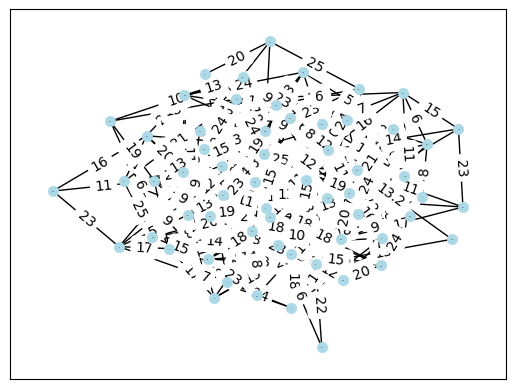

In [107]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [108]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
1520,45,58,1768.80
1124,45,54,1586.64
1297,11,45,1584.20
318,45,46,1577.68
1397,28,45,1569.20
...,...,...,...
350,27,46,127.60
1519,34,49,124.80
1333,11,35,112.00
1349,36,46,110.88


In [109]:
##### k = 2 # Recommended road to build first is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
1520,45,58,1768.8


In [110]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(45, 58)


In [111]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 8, (0, 3): 17, (0, 35): 20, (0, 59): 8, (0, 14): 13, (0, 27): 21, (0, 47): 8, (0, 32): 6, (0, 5): 17, (1, 12): 19, (1, 52): 5, (1, 50): 13, (1, 58): 18, (1, 39): 20, (1, 15): 15, (1, 13): 20, (1, 8): 6, (1, 22): 22, (2, 11): 24, (2, 3): 7, (2, 54): 18, (2, 8): 25, (2, 48): 14, (2, 20): 20, (3, 10): 19, (3, 38): 23, (3, 13): 7, (3, 31): 5, (4, 22): 20, (4, 14): 20, (4, 55): 18, (4, 6): 20, (4, 44): 12, (4, 5): 5, (4, 45): 16, (4, 15): 11, (5, 18): 14, (5, 31): 12, (5, 54): 19, (6, 25): 12, (6, 45): 9, (6, 31): 18, (6, 12): 20, (6, 46): 22, (6, 27): 10, (6, 21): 18, (6, 36): 13, (7, 12): 8, (7, 18): 24, (7, 22): 8, (7, 25): 21, (7, 45): 20, (8, 14): 8, (8, 23): 24, (8, 40): 7, (8, 35): 5, (8, 52): 21, (8, 51): 20, (8, 15): 11, (8, 34): 5, (8, 42): 15, (9, 31): 12, (9, 28): 14, (9, 56): 5, (9, 49): 10, (9, 48): 19, (9, 55): 18, (9, 46): 6, (9, 11): 9, (9, 47): 14, (9, 45): 6, (9, 58): 12, (10, 29): 21, (10, 16): 21, (10, 45): 21, (10, 54): 19, (10, 50): 24, (10, 30): 23, (10, 42

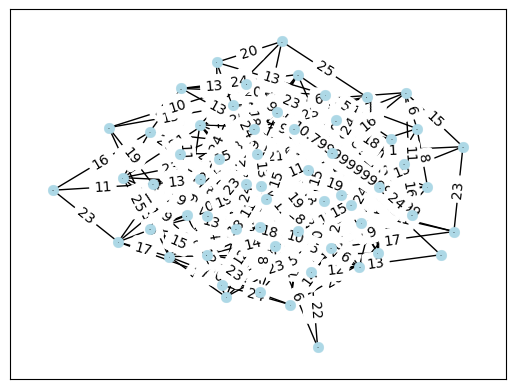

In [112]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)

In [113]:
r5_benefit_matrix = TrafficAnalyzer.get_road_recommendations(r5_city_map, r5_trips)
r5_benefit_matrix

,source,destination,benefit
374,37,45,1753.24
831,5,45,1627.80
304,23,45,1626.20
1124,45,54,1586.64
318,45,46,1577.68
...,...,...,...
350,27,46,127.60
1519,34,49,124.80
1333,11,35,112.00
1349,36,46,110.88


In [114]:
##### k = 3 # Recommended road to build last is the road segment
r5_max_benefit_matrix = TrafficAnalyzer.get_max_road_benefit(r5_benefit_matrix)
r5_max_benefit_matrix

,source,destination,benefit
374,37,45,1753.24


In [115]:
source, destination = get_max_benefit_road_segment(r5_max_benefit_matrix)
print(f"({source}, {destination})")

(37, 45)


In [116]:
CityMap.add_road_segment(r5_city_map, source, destination)

{(0, 20): 8, (0, 3): 17, (0, 35): 20, (0, 59): 8, (0, 14): 13, (0, 27): 21, (0, 47): 8, (0, 32): 6, (0, 5): 17, (1, 12): 19, (1, 52): 5, (1, 50): 13, (1, 58): 18, (1, 39): 20, (1, 15): 15, (1, 13): 20, (1, 8): 6, (1, 22): 22, (2, 11): 24, (2, 3): 7, (2, 54): 18, (2, 8): 25, (2, 48): 14, (2, 20): 20, (3, 10): 19, (3, 38): 23, (3, 13): 7, (3, 31): 5, (4, 22): 20, (4, 14): 20, (4, 55): 18, (4, 6): 20, (4, 44): 12, (4, 5): 5, (4, 45): 16, (4, 15): 11, (5, 18): 14, (5, 31): 12, (5, 54): 19, (6, 25): 12, (6, 45): 9, (6, 31): 18, (6, 12): 20, (6, 46): 22, (6, 27): 10, (6, 21): 18, (6, 36): 13, (7, 12): 8, (7, 18): 24, (7, 22): 8, (7, 25): 21, (7, 45): 20, (8, 14): 8, (8, 23): 24, (8, 40): 7, (8, 35): 5, (8, 52): 21, (8, 51): 20, (8, 15): 11, (8, 34): 5, (8, 42): 15, (9, 31): 12, (9, 28): 14, (9, 56): 5, (9, 49): 10, (9, 48): 19, (9, 55): 18, (9, 46): 6, (9, 11): 9, (9, 47): 14, (9, 45): 6, (9, 58): 12, (10, 29): 21, (10, 16): 21, (10, 45): 21, (10, 54): 19, (10, 50): 24, (10, 30): 23, (10, 42

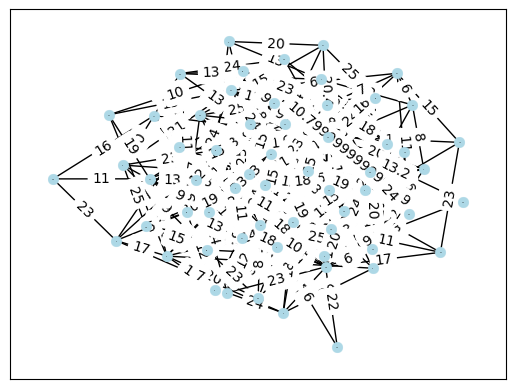

In [117]:
CityMap.visualize_city_map(r5_city_map, location_size=60, location_font_size=1, road_widths=1)